In [4]:
!pip install snscrape --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 593.6 kB/s eta 0:00:0031m75.3 MB/s eta 0:00:01
  Attempting uninstall: snscrape
    Found existing installation: snscrape 0.5.0.20230113
    Uninstalling snscrape-0.5.0.20230113:
      Successfully uninstalled snscrape-0.5.0.20230113


In [1]:
import snscrape.modules.twitter as sntwitter 
import pandas as pd 
import time

In [39]:
start_time = time.time()

query = "(from:amadhuzaifah)"
limit_tweets = 1
tweets = []

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
#     print(vars(tweet))
#     print(tweet)
#     break

    if len(tweets) == limit_tweets:
        break 
    else: 
        tweets.append([tweet.date, tweet.user.username, tweet.rawContent])
        
print("run time: ",'%.2f' % (time.time()-start_time), "seconds")

run time:  2.64 seconds


In [45]:
df = pd.DataFrame(tweets, columns=['Date', 'Username', 'Tweet'])
print(df)

Empty DataFrame
Columns: [Date, Username, Tweet]
Index: []


In [7]:
df.to_csv('data_aku.csv')

In [10]:
data = pd.read_csv('data_aku.csv')

In [11]:
pd.set_option('display.max_row', None)
data

,Unnamed: 0,Date,Username,Tweet
0,0,2023-03-10 11:06:08+00:00,sharulshafie_,🥹🥹


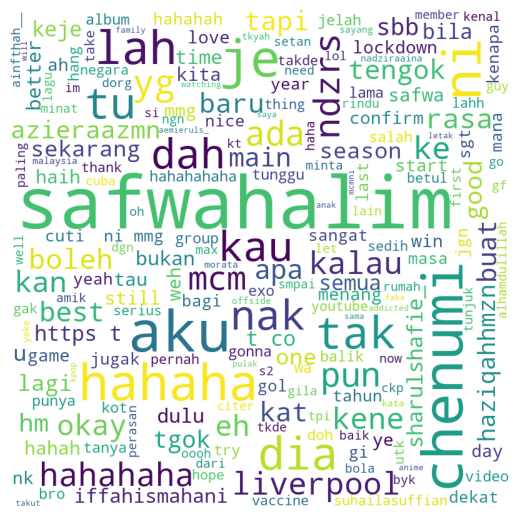

In [5]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in data.Tweet:
    
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens) + " "
    
wordcloud = WordCloud(width = 800,
                     height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size =  10).generate(comment_words)

plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

ref : https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words

In [26]:
text = "hello world"

print(text.split(' '))

['hello', 'world']


## remove meationed for (word cloud)

In [6]:
import re

tweets_no_mention = []

for i in data.Tweet:
    txt = re.sub("@\w+", "", i)
    tweets_no_mention.append(txt)

In [7]:
tweets_no_mention

[' our ultimate group collab hhahaha. rover ni addicted gila kan lagu dia hahaha',
 'this rover song stuck in my head.',
 'imagine perez start from p15, he will be nowhere near max.',
 'ffs red bull going to win all the races this season.',
 'millie bobby brown best actress of all time.',
 '11 episodes in and i gotta say bluelock is so predictable. why kene dramatic sgt gol msti nak last minute. smua sport related anime mmg mcmni. haikyuu pun sama je',
 'ntah2 dia ni borak kt rumah ngn bini dia pun baca pdf',
 'AI ni mmg tak boleh nak buat tangan tu elok2 ke??',
 ' fake news... fake fake',
 ' yelah tu. lpsni diaz, gakpo, nunez hahahahaha',
 ' nk nangis tengok video ni',
 ' aku dulu download kt tele je weh. kat hulu rasanya ada kot.',
 'the office\nb99\nthe good place\nhimym\nfamily guy\nprison break\nyou\nstranger things',
 ' tak garangg, ni hanya menegur hahaha',
 'hang dah salah hang minta maaf, nak takut consequences apa setan. salah kau tu berat.',
 'ada lagi ke orang hobby dia men

In [8]:
data['MentionRemove'] = tweets_no_mention
new_data = data.drop(columns=['Tweet'])
new_data

,Unnamed: 0,Date,Username,MentionRemove
0,0,2023-03-24 14:32:46+00:00,amadhudzaifah,our ultimate group collab hhahaha. rover ni a...
1,1,2023-03-23 05:15:19+00:00,amadhudzaifah,this rover song stuck in my head.
2,2,2023-03-20 03:02:53+00:00,amadhudzaifah,"imagine perez start from p15, he will be nowhe..."
3,3,2023-03-18 15:08:01+00:00,amadhudzaifah,ffs red bull going to win all the races this s...
4,4,2023-03-15 13:46:43+00:00,amadhudzaifah,millie bobby brown best actress of all time.
5,5,2023-03-11 22:55:52+00:00,amadhudzaifah,11 episodes in and i gotta say bluelock is so ...
6,6,2023-03-11 05:12:17+00:00,amadhudzaifah,ntah2 dia ni borak kt rumah ngn bini dia pun b...
7,7,2023-03-09 04:47:43+00:00,amadhudzaifah,AI ni mmg tak boleh nak buat tangan tu elok2 ke??
8,8,2023-03-04 10:13:47+00:00,amadhudzaifah,fake news... fake fake
9,9,2023-03-04 09:56:31+00:00,amadhudzaifah,"yelah tu. lpsni diaz, gakpo, nunez hahahahaha"


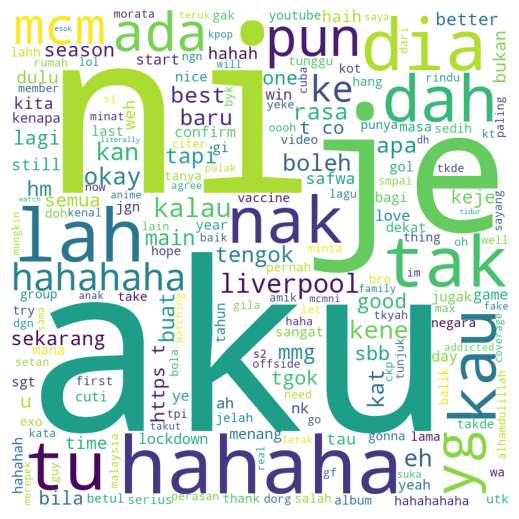

In [9]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in new_data.MentionRemove:
    
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens) + " "
    
wordcloud = WordCloud(width = 800,
                     height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size =  10).generate(comment_words)

plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [12]:
# @mention 

# loop every row -> find @ and slide -> store in df
# get frequency table (mentioned | count) 
import re 

txt = ""
mentioned = []

for i in data.Tweet:
    val = re.findall("@\w+", i)
#     print(val)
#     if (val != []):
#         mentioned.append(val)    
#     txt = ""
    
    for item in val:
        txt += ' ' + item
    
    mentioned.append(txt)

In [13]:
#the loop in txt adds ups! thats why select the last element 
#check yourself

mentioned

['']

In [14]:
#select the last element in array 

x = mentioned[-1]
x

''

In [15]:
#split the text space and insert into array
y = x.split(' ')

In [16]:
#remove firt element
y.pop(0)

''

In [26]:
mentioned_table = pd.DataFrame(y, columns=['Mentioned'])

mentioned_table

,Mentioned


In [25]:
mentioned_table_count = pd.crosstab(index=mentioned_table['Mentioned'], columns="count")

if mentioned_table_count != []:
    mentioned_table_count.sort_values(by=['count'], ascending=False)

/tmp/ipykernel_13149/4060136396.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if mentioned_table_count != []:


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [83]:
date_data = pd.to_datetime(data['Date']).dt.date
# print(date_data)
df_date = date_data.groupby(date_data).size().reset_index(name='count')
print(df_date)

           Date  count
0    2021-02-03      1
1    2021-02-07      1
2    2021-02-08      1
3    2021-02-14      1
4    2021-03-02      3
5    2021-03-05      1
6    2021-03-08      2
7    2021-03-10      1
8    2021-03-14     12
9    2021-03-19      2
10   2021-03-22      3
11   2021-04-07      3
12   2021-04-08      2
13   2021-04-11      2
14   2021-04-12      1
15   2021-04-22      9
16   2021-04-26      3
17   2021-04-27      1
18   2021-04-28      1
19   2021-04-29      1
20   2021-05-04      1
21   2021-05-08      1
22   2021-05-19      1
23   2021-05-20      1
24   2021-05-25      1
25   2021-05-27      3
26   2021-05-28      1
27   2021-06-04      1
28   2021-06-05      1
29   2021-06-06      1
30   2021-06-07      2
31   2021-06-08      1
32   2021-06-10      4
33   2021-06-12      4
34   2021-06-13      5
35   2021-06-14      4
36   2021-06-15      1
37   2021-06-16      2
38   2021-06-17      3
39   2021-06-18      8
40   2021-06-19      5
41   2021-06-20      2
42   2021-0

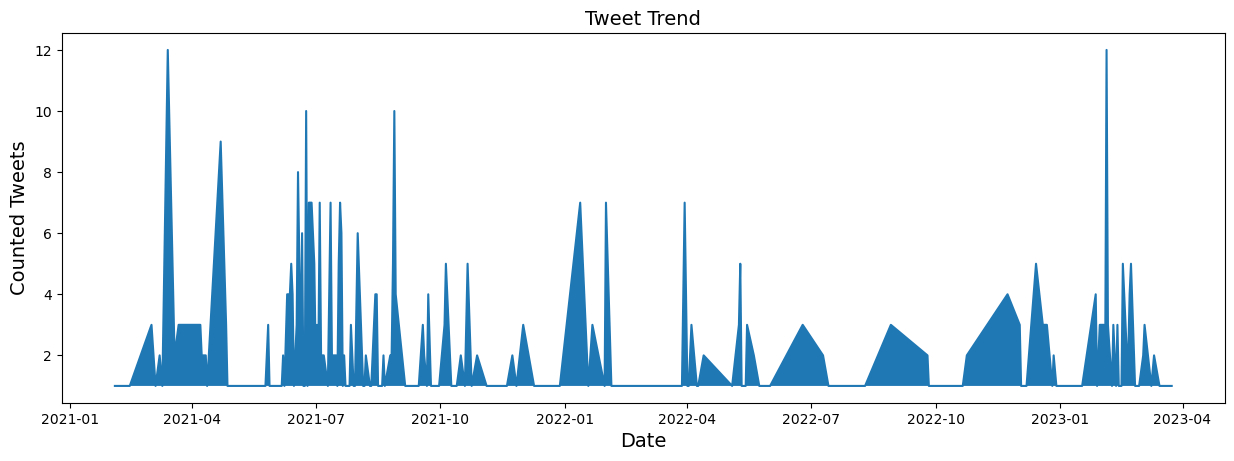

In [43]:
#fig size should be on top before plt.plot !
plt.figure().set_figwidth(15)

x = df_date['Date']
y = df_date['count']

plt.plot(x,y)

#fill the shaded region
plt.fill(x,y)

plt.title('Tweet Trend', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Counted Tweets', fontsize=14)

plt.show()

In [44]:
df_date.describe()

,count
count,216.000000
mean,2.314815
std,2.067008
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,12.000000
